  Departamento  3 TORRES CONTRATISTAS GENERALES SAC  3G CONSTRUCTORA SAC  \
0     AMAZONAS                                    0                    0   
1       ANCASH                                    0                    0   
2     APURIMAC                                    0                    0   
3     AREQUIPA                                    0                    0   
4     AYACUCHO                                    0                    0   

   4R PROMOTORES Y CONSTRUCTORES SRL  A & C CONSULTORES Y EJECUTORES EIRL  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   

   A & D CELESTE CONTRATISTAS GENERALES EIRL  \
0                               

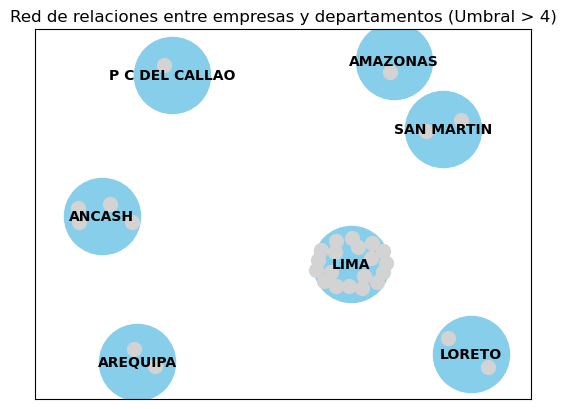

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
file_path = 'tablita.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe para verificar la estructura
print(df.head())

# Inicializar una lista para las aristas y conjuntos para nodos de departamentos y empresas
edges = []
departments = set()
companies = set()

# Ajustar el umbral para filtrar las relaciones significativas
threshold = 4

# Recorrer cada fila (cada departamento)
for index, row in df.iterrows():
    # Obtener el nombre del departamento
    department = row['Departamento']  # Ajustar según el nombre exacto de la columna del departamento
    departments.add(department)

    # Recorrer cada columna (cada empresa)
    for company in df.columns:
        if company != 'Departamento' and row[company] > threshold:  # Cambiar el umbral según lo necesario
            edges.append((department, company))
            companies.add(company)

# Crear el grafo
G = nx.Graph()
G.add_edges_from(edges)

# Filtrar nodos que tienen al menos una conexión
connected_departments = {node for node, degree in G.degree(departments) if degree > 0}
connected_companies = {node for node, degree in G.degree(companies) if degree > 0}

# Posicionamiento de los nodos
pos = nx.spring_layout(G, seed=42)

# Dibujar nodos de departamentos y empresas por separado para aplicar diferentes etiquetas
nx.draw_networkx_nodes(G, pos, nodelist=connected_departments, node_color='skyblue', node_size=3000)
nx.draw_networkx_nodes(G, pos, nodelist=connected_companies, node_color='lightgray', node_size=100)

# Dibujar las aristas
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Dibujar etiquetas solo para los departamentos conectados
nx.draw_networkx_labels(G, pos, labels={node: node for node in connected_departments}, font_size=10, font_weight='bold')

# Configurar título del gráfico
plt.title(f"Red de relaciones entre empresas y departamentos (Umbral > {threshold})")
plt.show()
